In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [13]:
#loading csv file
df = pd.read_csv("Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv")

#dropping columns
df = df.drop(columns=['Geography Type'])

#filtering DF again to keep only rows where Dimension Type = 'Age' 
df = df[df['Dimension Type'] == 'Age']

#sorting by vaccine type (column is named 'Vaccine')
df_sorted = df.sort_values (by='Vaccine')

#Displaying the sorted DataFrame
df_sorted

df


,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...
128183,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [14]:
# Defining a dictionary to map each state to respective region
#expanding from original 4 regions to 9 regions: 
    #Pacific West, Mountain West, West North Central, East North Central, East South Central 
    # West South Central, South Atlantic, Middle Atlantic, New England
state_to_region = {
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'NY-Rest of state': 'Middle Atlantic', 'NY-City of New York': 'Middle Atlantic', 
    'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic', 
    'PA-Philadelphia': 'Middle Atlantic', 'PA-Rest of state': 'Middle Atlantic',

    # New England
    'Vermont': 'New England', 'New Hampshire': 'New England', 'Massachusetts': 'New England', 
    'Connecticut': 'New England', 'Rhode Island': 'New England', 'Maine': 'New England',

    # East North Central
    'Indiana': 'East North Central', 'Illinois': 'East North Central', 'Michigan':'East North Central', 'Ohio': 'East North Central', 
    'Wisconsin': 'East North Central', 'IL-City of Chicago': 'East North Central', 
    'IL-Rest of state': 'East North Central',

    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central',
    'Missouri': 'West North Central', 'Nebraska': 'West North Central', 'North Dakota': 'West North Central', 
    'South Dakota': 'West North Central',

    #South Atlantic
    'Delaware': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'Florida': 'South Atlantic', 
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic', 'South Carolina': 'South Atlantic',
    'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',

    #East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central', 'Mississippi': 'East South Central', 
    'Tennessee': 'East South Central', 

    #West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central', 
    'Texas': 'West South Central', 'TX-City of Houston': 'West South Central', 'TX-Rest of state': 'West South Central',
    'TX-Dallas County': 'West South Central', 'TX-Bexar County':'West South Central', 'TX-El Paso County': 'West South Central',
    'TX-Hidalgo County': 'West South Central', 'TX-Tarrant County':'West South Central',

    #Mountain 
    'Arizona': 'Mountain', 'Colorado': 'Mountain', 'Idaho':'Mountain', 'New Mexico':'Mountain', 
    'Montana': 'Mountain', 'Utah':'Mountain', 'Nevada': 'Mountain', 'Wyoming': 'Mountain',

    #Pacific
    'Alaska': 'Pacific', 'California': 'Pacific', 'Hawaii': 'Pacific', 'Oregon': 'Pacific',
    'Washington': 'Pacific'
}

# Mapping each state in the 'Geography' column to its region
df['Region'] = df['Geography'].map(state_to_region)

# Reordering columns so that 'Region' appears first
df = df[['Region'] + [col for col in df.columns if col != 'Region']]

# Display the updated DataFrame
df



,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,West North Central,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,West North Central,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,West North Central,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,West North Central,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,West North Central,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...,...
128183,New England,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,New England,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,New England,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,New England,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [100]:
# Filter the DataFrame to only include rows where:
# - 'Vaccine' is 'DTaP' and 'MMR'
# - 'Birth Cohort' is '2020-2021'

# Create df_filtered based on conditions in the 'Vaccine' and 'Birth Year/Birth Cohort' columns
df_filtered = df[
    (df['Vaccine'].isin(['DTaP','≥1 Dose MMR'])) &
    (df['Birth Year/Birth Cohort'].isin(['2020-2021', '2020', '2021'])) &

    #(df['Dimension'].isin(['19 Months','24 Months','35 Months']))
    
  (df['Dimension'] =='35 Months')
    
    ]

# Rename the column 'Estimate (%)' to 'Estimated Percentage' in df_filtered
df_filtered = df_filtered.rename(columns={'Estimate (%)': 'Estimated_Percentage'})

# Exclude rows where 'Region' is NaN
df_filtered = df_filtered.dropna(subset=['Region'])

df_filtered


,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimated_Percentage,95% CI (%),Sample Size
23,West North Central,DTaP,≥4 Doses,North Dakota,2021,Age,35 Months,77.2,67.0 to 86.1,143.0
44,West North Central,≥1 Dose MMR,NaN,North Dakota,2020-2021,Age,35 Months,91.0,85.0 to 95.2,391.0
47,West North Central,DTaP,≥3 Doses,North Dakota,2021,Age,35 Months,93.4,85.5 to 97.8,143.0
981,South Atlantic,DTaP,≥4 Doses,North Carolina,2020-2021,Age,35 Months,89.1,84.6 to 92.7,764.0
1174,South Atlantic,≥1 Dose MMR,NaN,North Carolina,2020,Age,35 Months,94.1,89.9 to 97.0,459.0
...,...,...,...,...,...,...,...,...,...,...
127710,New England,DTaP,≥4 Doses,New Hampshire,2020,Age,35 Months,93.5,88.6 to 96.9,189.0
127713,New England,≥1 Dose MMR,NaN,New Hampshire,2020,Age,35 Months,94.4,89.1 to 97.7,189.0
127918,New England,≥1 Dose MMR,NaN,New Hampshire,2021,Age,35 Months,96.6,93.2 to 98.6,126.0
127978,New England,DTaP,≥3 Doses,New Hampshire,2020,Age,35 Months,98.8,96.8 to 99.7,189.0


In [118]:
# Define the 9 regions including 'East South Central'
regions_of_interest = ['Middle Atlantic', 'Pacific', 'Mountain', 
                       'West North Central', 'East North Central', 'West South Central', 
                       'South Atlantic', 'New England', 'East South Central']

# Filter the dataset for 'DTaP' and 'MMR' vaccines, and the 9 specific regions
df_filtered = df_filtered[df_filtered['Vaccine'].isin(['DTaP', '≥1 Dose MMR'])]
df_filtered = df_filtered[df_filtered['Region'].isin(regions_of_interest)]

# Ensure that 'Region' and 'Vaccine' are treated as categorical variables
df_filtered['Region'] = df_filtered['Region'].astype('category')
df_filtered['Vaccine'] = df_filtered['Vaccine'].astype('category')

# Fit the model with interaction term between 'Region' and 'Vaccine'
model = ols('Estimated_Percentage ~ C(Region) + C(Vaccine) + C(Region):C(Vaccine)', data=df_filtered).fit()

# Perform the two-way ANOVA
anova_results = anova_lm(model)

# Display the ANOVA table
print(anova_results)


                         df       sum_sq     mean_sq          F        PR(>F)
C(Region)               8.0  1990.900143  248.862518  13.093180  2.799300e-17
C(Vaccine)              1.0   679.252083  679.252083  35.736879  4.189172e-09
C(Region):C(Vaccine)    8.0    35.125973    4.390747   0.231006  9.851292e-01
Residual              522.0  9921.671800   19.007034        NaN           NaN


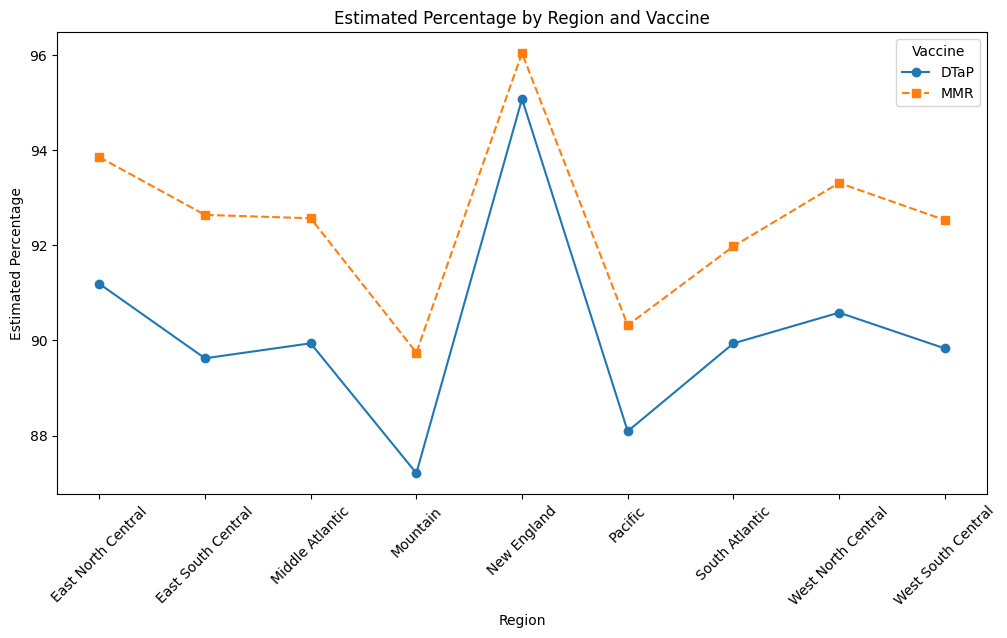

In [119]:


# Calculate the mean 'Estimated Percentage' for each Region and Vaccine combination
means = df_filtered.groupby(['Region', 'Vaccine'])['Estimated_Percentage'].mean().reset_index()

# Separate the data by Vaccine for plotting
dtap_means = means[means['Vaccine'] == 'DTaP']
mmr_means = means[means['Vaccine'] == '≥1 Dose MMR']

# Plot the mean Estimated Percentage by Region for each Vaccine type
plt.figure(figsize=(12, 6))

# Plot DTaP means
plt.plot(dtap_means['Region'], dtap_means['Estimated_Percentage'], marker='o', linestyle='-', label='DTaP')

# Plot MMR means
plt.plot(mmr_means['Region'], mmr_means['Estimated_Percentage'], marker='s', linestyle='--', label='MMR')

# Customize the plot
plt.title('Estimated Percentage by Region and Vaccine')
plt.xlabel('Region')
plt.ylabel('Estimated Percentage')
plt.xticks(rotation=45)
plt.legend(title='Vaccine')
plt.show()


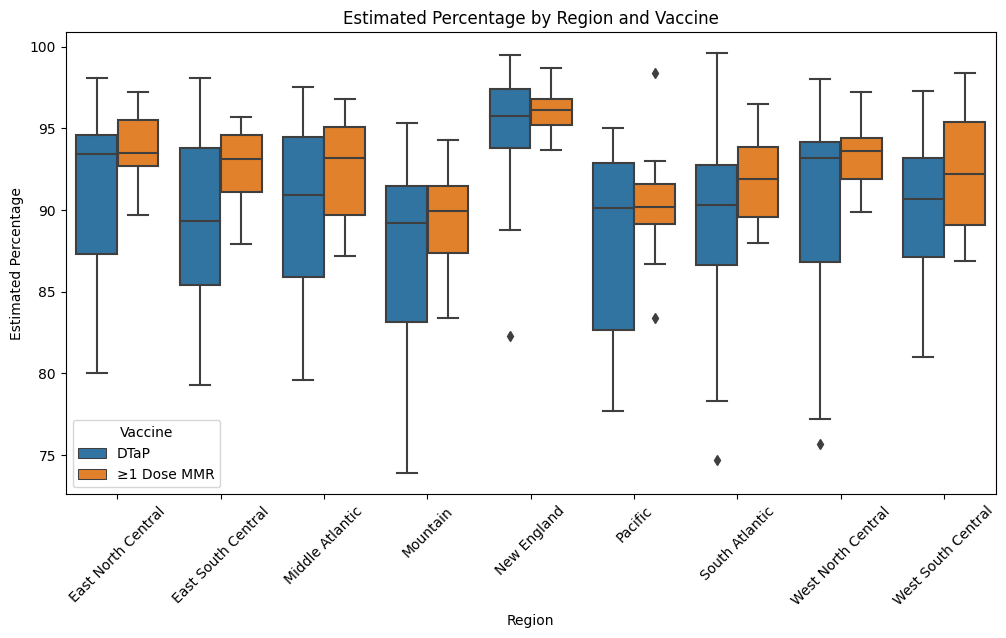

In [120]:


#BOXPLOT VISUALIZATION: age of 35 months
# Create a boxplot to visualize the 'Estimated_Percentage' by 'Region' and 'Vaccine'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated_Percentage', hue='Vaccine', data=df_filtered)

# Customize the plot
plt.title('Estimated Percentage by Region and Vaccine')
plt.xlabel('Region')
plt.ylabel('Estimated Percentage')
plt.xticks(rotation=45)
plt.legend(title='Vaccine')
plt.show()


In [ ]:
# p-value changes depending on what age group is being focused on
# if we're only focusing on the uptake rates of each vaccine depending on 
# the age at which they are released, then there is no signficance between
# vaccine type in terms of uptake

#BUT if we are considering age, for ex. 35 months is an age where children should
# have received at least 1 dose of MMR and at least 3 doses of DTaP (which does
# not include any children who received just 1 or 2 doses but are 35 months old anyways
#and technically did receive vaccination, just not fully up to date), then there is
# a significant different between vaccine types

In [104]:
# Tukey test for Region
tukey_region = pairwise_tukeyhsd(
    endog=df_filtered['Estimated_Percentage'],  # Dependent variable
    groups=df_filtered['Region'],              # Grouping variable
    alpha=0.01                                 # Significance level
)

print(tukey_region)
# Assuming `tukey_result` is the output of `pairwise_tukeyhsd`
tukey_df = pd.DataFrame(data=tukey_region.summary().data[1:], columns=tukey_region.summary().data[0])


            Multiple Comparison of Means - Tukey HSD, FWER=0.01             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
East North Central East South Central  -1.4504 0.8305 -4.8278   1.927  False
East North Central    Middle Atlantic  -1.2635 0.8131 -4.1437  1.6167  False
East North Central           Mountain  -4.0268    0.0 -6.8155  -1.238   True
East North Central        New England   3.3209 0.0023  0.3231  6.3187   True
East North Central            Pacific  -3.2476 0.0068 -6.4027 -0.0925   True
East North Central     South Atlantic  -1.4612 0.5836 -4.1767  1.2543  False
East North Central West North Central  -0.5857 0.9983 -3.4659  2.2945  False
East North Central West South Central  -1.3476 0.7526 -4.2278  1.5326  False
East South Central    Middle Atlantic   0.1869    1.0 -3.1905  3.5643  False
East South Central           Mountain  -2.5764 0.1119 -5.8761  0.7233  False

In [105]:
# Display significant results
significant_results = tukey_df[tukey_df['reject'] == True]


print(significant_results)

                group1              group2  meandiff   p-adj   lower    upper  \
2   East North Central            Mountain   -4.0268  0.0000 -6.8155  -1.2380   
3   East North Central         New England    3.3209  0.0023  0.3231   6.3187   
4   East North Central             Pacific   -3.2476  0.0068 -6.4027  -0.0925   
10  East South Central         New England    4.7713  0.0000  1.2931   8.2495   
16     Middle Atlantic         New England    4.5844  0.0000  1.5866   7.5822   
21            Mountain         New England    7.3477  0.0000  4.4376  10.2578   
24            Mountain  West North Central    3.4411  0.0003  0.6523   6.2298   
26         New England             Pacific   -6.5685  0.0000 -9.8314  -3.3057   
27         New England      South Atlantic   -4.7821  0.0000 -7.6220  -1.9422   
28         New England  West North Central   -3.9066  0.0001 -6.9044  -0.9088   
29         New England  West South Central   -4.6685  0.0000 -7.6663  -1.6707   

    reject  
2     True  
3

In [121]:
# Tukey test for Vaccine
tukey_vaccine = pairwise_tukeyhsd(
    endog=df_filtered['Estimated_Percentage'],  # Dependent variable
    groups=df_filtered['Vaccine'],             # Grouping variable
    alpha=0.01                                 # Significance level
)

# Print Tukey test summary for Vaccine
print(tukey_vaccine)


 Multiple Comparison of Means - Tukey HSD, FWER=0.01  
group1    group2   meandiff p-adj lower  upper  reject
------------------------------------------------------
  DTaP ≥1 Dose MMR   2.3792   0.0 1.2671 3.4912   True
------------------------------------------------------
